In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Read Data

In [2]:
df = pd.read_csv("./datasets/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

2. Exploratory Data Analysis

2.1. Seperate numerical & categorical Features !

In [62]:
numerical_features = ["LotFrontage", "LotArea", "MasVnrArea",
                      "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF",
                      "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
                      "FullBath","HalfBath", "BedroomAbvGr","KitchenAbvGr", "TotRmsAbvGrd",
                      "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF",
                      "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
df_numerical = df[numerical_features]

In [55]:
numerical_categorical_features = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold" ]

In [162]:
categorical_features = [col for col in df.columns.tolist() if col not in numerical_features and col not in numerical_categorical_features]
categorical_features.remove('Id')
categorical_features.remove('SalePrice')
df_categorical = df[categorical_features]

2.2 Numerical Features

In [64]:
na_counts = df_numerical.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [65]:
df_numerical.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [70]:
# Fill NaN values with median

df_numerical.loc[df_numerical['LotFrontage'].isna(), "LotFrontage"] = df_numerical["LotFrontage"].median()
df_numerical.loc[df_numerical['MasVnrArea'].isna(), "MasVnrArea"] = df_numerical["MasVnrArea"].median()

<Axes: >

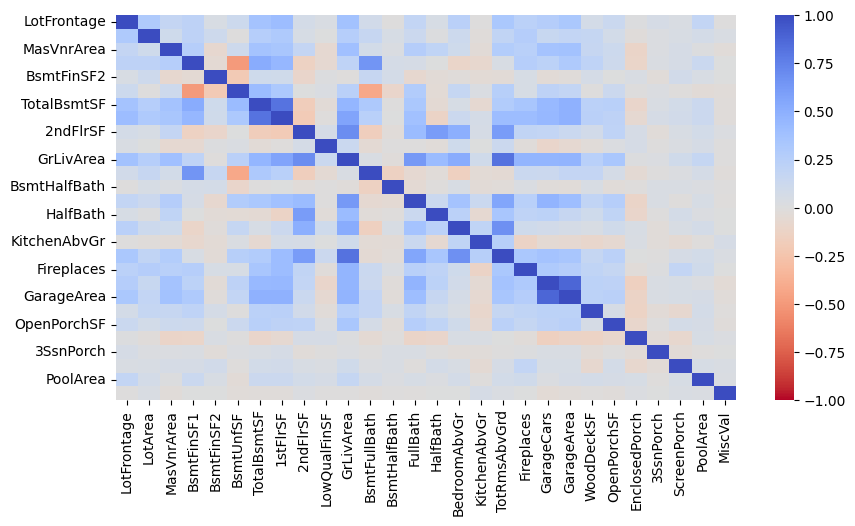

In [101]:
# Correlation btw numerical features
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_numerical.corr(), cmap='coolwarm_r', vmin = -1, vmax = 1, center = 0)

In [87]:
# Feature selection
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest

fselection = SelectKBest(score_func = r_regression, k="all")
fselection.fit_transform(df_numerical, df["SalePrice"])

fselection_df = pd.DataFrame(fselection.scores_, index = df_numerical.columns, columns= ['Score'])
fselection_df


,Score
LotFrontage,0.334771
LotArea,0.263843
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378
BsmtUnfSF,0.214479
TotalBsmtSF,0.613581
1stFlrSF,0.605852
2ndFlrSF,0.319334
LowQualFinSF,-0.025606


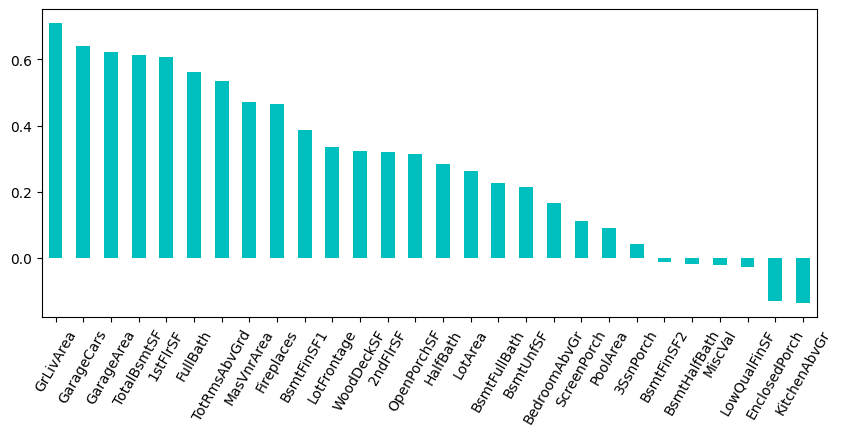

In [131]:
fselection_df['Score'].sort_values(ascending=False).plot.bar(figsize=(10,4), color = 'c')
plt.xticks(rotation=60)
plt.show()


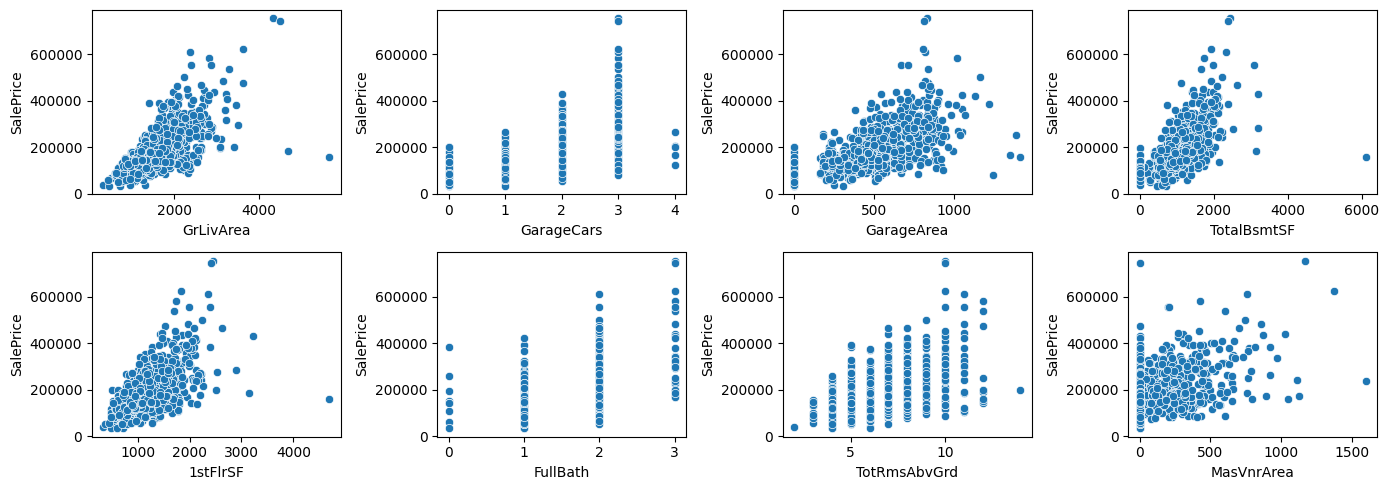

In [128]:
import warnings
warnings.filterwarnings("ignore", message=".*is_categorical_dtype is deprecated.*", category=FutureWarning)

fig, axs = plt.subplots(2, 4, figsize=(14, 5))

sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", ax=axs[0, 0])
sns.scatterplot(data=df, x="GarageCars", y="SalePrice", ax=axs[0, 1])
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", ax=axs[0, 2])
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", ax=axs[0, 3])
sns.scatterplot(data=df, x="1stFlrSF", y="SalePrice", ax=axs[1, 0])
sns.scatterplot(data=df, x="FullBath", y="SalePrice",  ax=axs[1, 1])
sns.scatterplot(data=df, x="TotRmsAbvGrd", y="SalePrice", ax=axs[1, 2])
sns.scatterplot(data=df, x="MasVnrArea", y="SalePrice",  ax=axs[1, 3])

plt.tight_layout()
plt.show()

c:\Users\hilmi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hilmi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GrLivArea', ylabel='Count'>

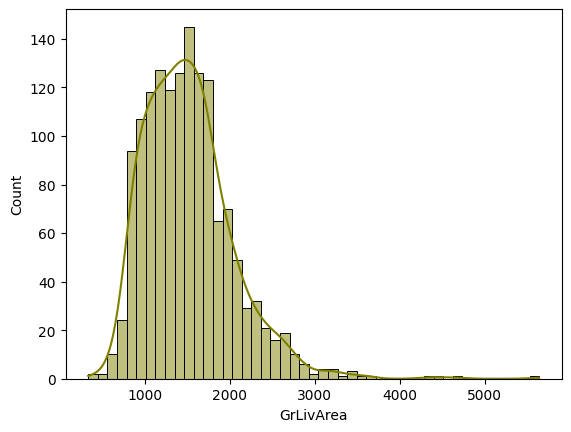

In [105]:
sns.histplot(data = df_numerical, x = "GrLivArea", kde=True, color="olive" )

2.3 Categorical features

In [164]:
na_counts = df_categorical.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
Electrical         1
dtype: int64

For the categorical features, the NaN values represent the 'none' modality !! so we will not consider them as NaN values. 
Instead, we will simply change the type of the columns to string.

In [169]:
na_counts = na_counts[na_counts > 0]
for col in na_counts.index.tolist():
    df_categorical.loc[:, col] = df_categorical[col].astype(str)

In [170]:
df_categorical.isna().sum().sum()

0

In [191]:
df_categorical['PoolQC'].dtypes == "object"

True

In [193]:
# Encode qualitative variables of type object.
from sklearn.preprocessing import LabelEncoder

df_categorical_enc = df_categorical.copy()

for col in df_categorical_enc.columns:
    encoder = LabelEncoder()
    if df_categorical_enc[col].dtypes == "object":
        df_categorical_enc[col] = encoder.fit_transform(df_categorical_enc[col])

df_categorical_enc

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,3,1,2,3,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
1,20,3,1,2,3,3,0,2,0,24,...,1,1,4,4,2,3,4,4,8,4
2,60,3,1,2,0,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
3,70,3,1,2,0,3,0,0,0,6,...,5,2,4,4,2,3,4,4,8,0
4,60,3,1,2,0,3,0,2,0,15,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,1,2,3,3,0,4,0,8,...,1,1,4,4,2,3,4,4,8,4
1456,20,3,1,2,3,3,0,4,0,14,...,1,2,4,4,2,3,2,4,8,4
1457,70,3,1,2,3,3,0,4,0,6,...,1,1,4,4,2,3,0,2,8,4
1458,20,3,1,2,3,3,0,4,0,12,...,1,2,4,4,2,3,4,4,8,4


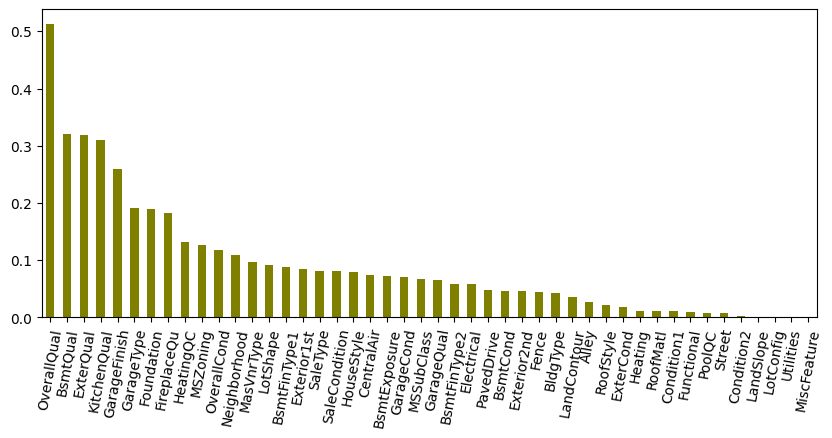

In [205]:
# Feature selection
from sklearn.feature_selection import mutual_info_regression, f_classif
from sklearn.feature_selection import SelectKBest

fselection = SelectKBest(score_func = mutual_info_regression, k="all")
fselection.fit_transform(df_categorical_enc, df["SalePrice"])

fselection_df = pd.DataFrame(fselection.scores_, index = df_categorical_enc.columns, columns= ['Score'])
fselection_df['Score'].sort_values(ascending=False).plot.bar(figsize=(10,4), color = 'olive')
plt.xticks(rotation=80)
plt.show()
